[1/100] 07:10:28 - lat: 48.48, long: -62.54
[2/100] 07:10:40 - lat: 48.19, long: -61.51
[3/100] 07:10:51 - lat: 47.92, long: -60.57
[4/100] 07:11:03 - lat: 47.62, long: -59.56
[5/100] 07:11:14 - lat: 47.33, long: -58.65
[6/100] 07:11:27 - lat: 46.99, long: -57.58
[7/100] 07:11:38 - lat: 46.68, long: -56.69
[8/100] 07:11:50 - lat: 46.34, long: -55.73
[9/100] 07:12:01 - lat: 46.02, long: -54.86
[10/100] 07:12:12 - lat: 45.70, long: -54.00
[11/100] 07:12:23 - lat: 45.36, long: -53.15
[12/100] 07:12:34 - lat: 45.02, long: -52.31
[13/100] 07:12:45 - lat: 44.68, long: -51.48
[14/100] 07:12:56 - lat: 44.32, long: -50.67
[15/100] 07:13:08 - lat: 43.93, long: -49.79
[16/100] 07:13:19 - lat: 43.56, long: -48.99
[17/100] 07:13:30 - lat: 43.19, long: -48.21
[18/100] 07:13:42 - lat: 42.78, long: -47.36
[19/100] 07:13:53 - lat: 42.39, long: -46.60
[20/100] 07:14:04 - lat: 42.00, long: -45.84
[21/100] 07:14:15 - lat: 41.60, long: -45.10
[22/100] 07:14:27 - lat: 41.16, long: -44.30
[23/100] 07:14:38 -

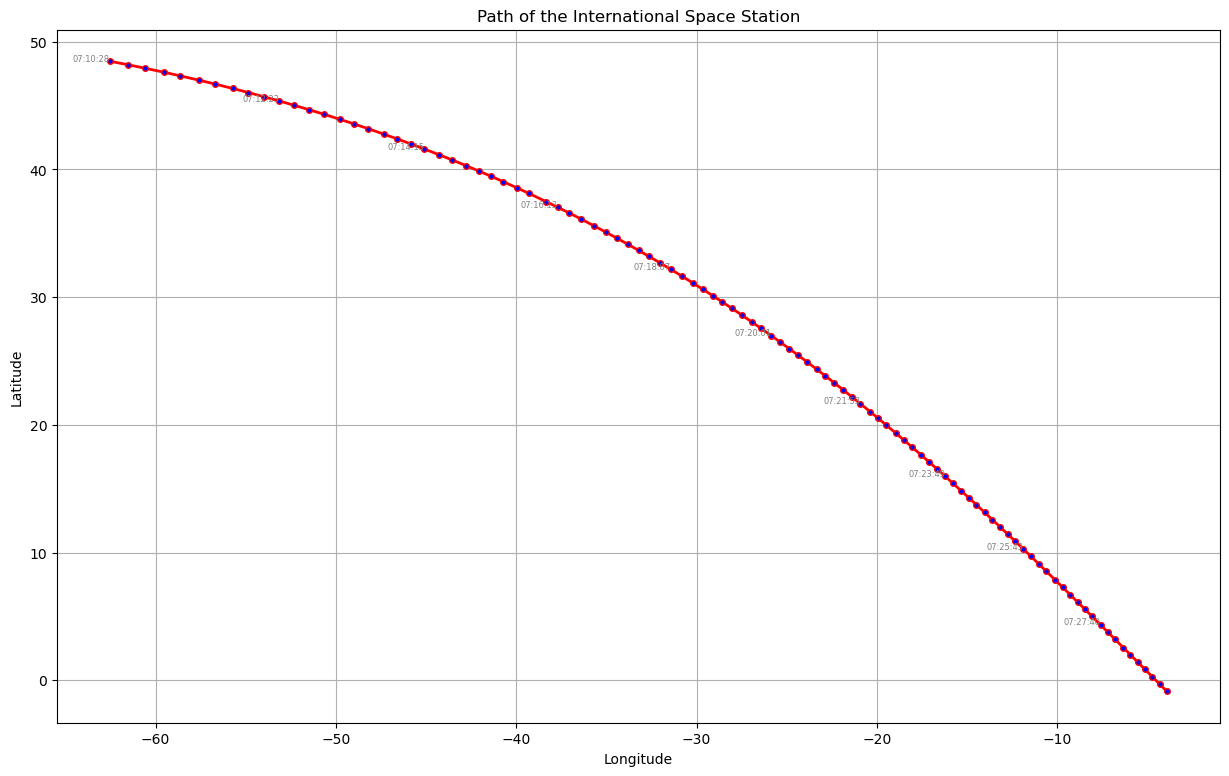

In [1]:
import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

timestamp_list = []
longitude_list = []
latitude_list = []

# Collect 100 points, spaced 10 seconds apart
for i in range(100):
    link = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    coordinate_table = link.json()

    timestamp = coordinate_table['timestamp']
    longitude = coordinate_table['longitude']
    latitude = coordinate_table['latitude']

    readable_time = datetime.utcfromtimestamp(timestamp).strftime('%H:%M:%S')

    timestamp_list.append(readable_time)
    longitude_list.append(longitude)
    latitude_list.append(latitude)

    print(f"[{i+1}/100] {readable_time} - lat: {latitude:.2f}, long: {longitude:.2f}")
    time.sleep(10)  # Sleep 10 seconds

# Plot the results
plt.figure(figsize=(15, 9))
plt.plot(longitude_list, latitude_list, color='r', linestyle='-', linewidth=2,
         marker='o', markerfacecolor='blue', markersize=4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Path of the International Space Station")
plt.grid(True)

# Label every 10th point to avoid clutter
for i, (lo, la, t) in enumerate(zip(longitude_list, latitude_list, timestamp_list)):
    if i % 10 == 0:
        plt.text(lo, la, t, fontsize=6, ha='right', color='gray')

plt.show()
